<a href="https://colab.research.google.com/github/elbse/bitcoin-sentiment-analysis/blob/main/bitcoin_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries

import pandas as pd
from textblob import TextBlob
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv(
    '/content/drive/MyDrive/MyDrive/tweets.csv',
    nrows=10000,
    sep=';',  # <-- THIS is the fix!
    encoding='utf-8',
    on_bad_lines='skip'
)

print(f"Loaded {len(df)} rows")
print(df.head())
print("\nColumns:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Mounted at /content/drive
Loaded 10000 rows
                    id           user             fullname  url  \
0  1132977055300300800   KamdemAbdiel        Abdiel kamdem  NaN   
1  1132977073402736640      bitcointe            Bitcointe  NaN   
2  1132977023893139456      3eyedbran  Bran - 3 Eyed Raven  NaN   
3  1132977089089556481  DetroitCrypto          J. Scardina  NaN   
4  1132977092340191232   mmursaleen72   Muhammad Mursaleen  NaN   

                timestamp  replies  likes  retweets  \
0  2019-05-27 11:49:14+00        0      0         0   
1  2019-05-27 11:49:18+00        0      0         0   
2  2019-05-27 11:49:06+00        0      2         1   
3  2019-05-27 11:49:22+00        0      0         0   
4  2019-05-27 11:49:23+00        0      0         0   

                                                text  
0  È appena uscito un nuovo video! LES CRYPTOMONN...  
1  Cardano: Digitize Currencies; EOS https://t.co...  
2  Another Test tweet that wasn't caught in the s...  
3 

In [3]:
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [4]:
print(f"Dataset size: {len(df)} tweets")
print(f"Columns: {df.columns.tolist()}")

Dataset size: 10000 tweets
Columns: ['id', 'user', 'fullname', 'url', 'timestamp', 'replies', 'likes', 'retweets', 'text']


In [5]:
def clean_text(text):
    """
    Clean tweet text for sentiment analysis
    """
    if pd.isna(text):
        return ""

    # Convert to string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (keep the text, remove #)
    text = re.sub(r'#', '', text)

    # Remove special characters but keep letters and basic punctuation
    text = re.sub(r'[^A-Za-z0-9\s!?.,]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Convert to lowercase
    text = text.lower()

    return text.strip()

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove empty tweets
df = df[df['cleaned_text'] != '']

print(f"\nAfter cleaning: {len(df)} tweets")
print("\nSample cleaned tweets:")
print(df[['text', 'cleaned_text']].head())


After cleaning: 9806 tweets

Sample cleaned tweets:
                                                text  \
0  È appena uscito un nuovo video! LES CRYPTOMONN...   
1  Cardano: Digitize Currencies; EOS https://t.co...   
2  Another Test tweet that wasn't caught in the s...   
3  Current Crypto Prices! \n\nBTC: $8721.99 USD\n...   
4  Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...   

                                        cleaned_text  
0  appena uscito un nuovo video! les cryptomonnai...  
1  cardano digitize currencies eos 6500 roi atamp...  
2  another test tweet that wasnt caught in the st...  
3  current crypto prices! btc 8721.99 usd eth 266...  
4  spiv nosar baz bitcoin is an asset amp not a c...  


In [6]:
def get_sentiment_score(text):
    """
    Get sentiment polarity score
    Returns: float between -1 (negative) and 1 (positive)
    """
    try:
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    except:
        return 0

# Calculate sentiment scores
print("\nCalculating sentiment scores...")
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment_score)

print("Sentiment scores calculated!")
print(f"\nAverage sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Min sentiment: {df['sentiment_score'].min():.3f}")
print(f"Max sentiment: {df['sentiment_score'].max():.3f}")


Calculating sentiment scores...
Sentiment scores calculated!

Average sentiment: 0.095
Min sentiment: -1.000
Max sentiment: 1.000


In [7]:
def classify_sentiment(score):
    """
    Classify sentiment based on polarity score
    """
    if score > 0.1:
        return 'Bullish'
    elif score < -0.1:
        return 'Bearish'
    else:
        return 'Neutral'

# Apply classification
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Show distribution
print("\n=== SENTIMENT DISTRIBUTION ===")
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)
print(f"\nPercentages:")
print((sentiment_counts / len(df) * 100).round(2))


=== SENTIMENT DISTRIBUTION ===
sentiment_label
Neutral    6208
Bullish    3083
Bearish     515
Name: count, dtype: int64

Percentages:
sentiment_label
Neutral    63.31
Bullish    31.44
Bearish     5.25
Name: count, dtype: float64


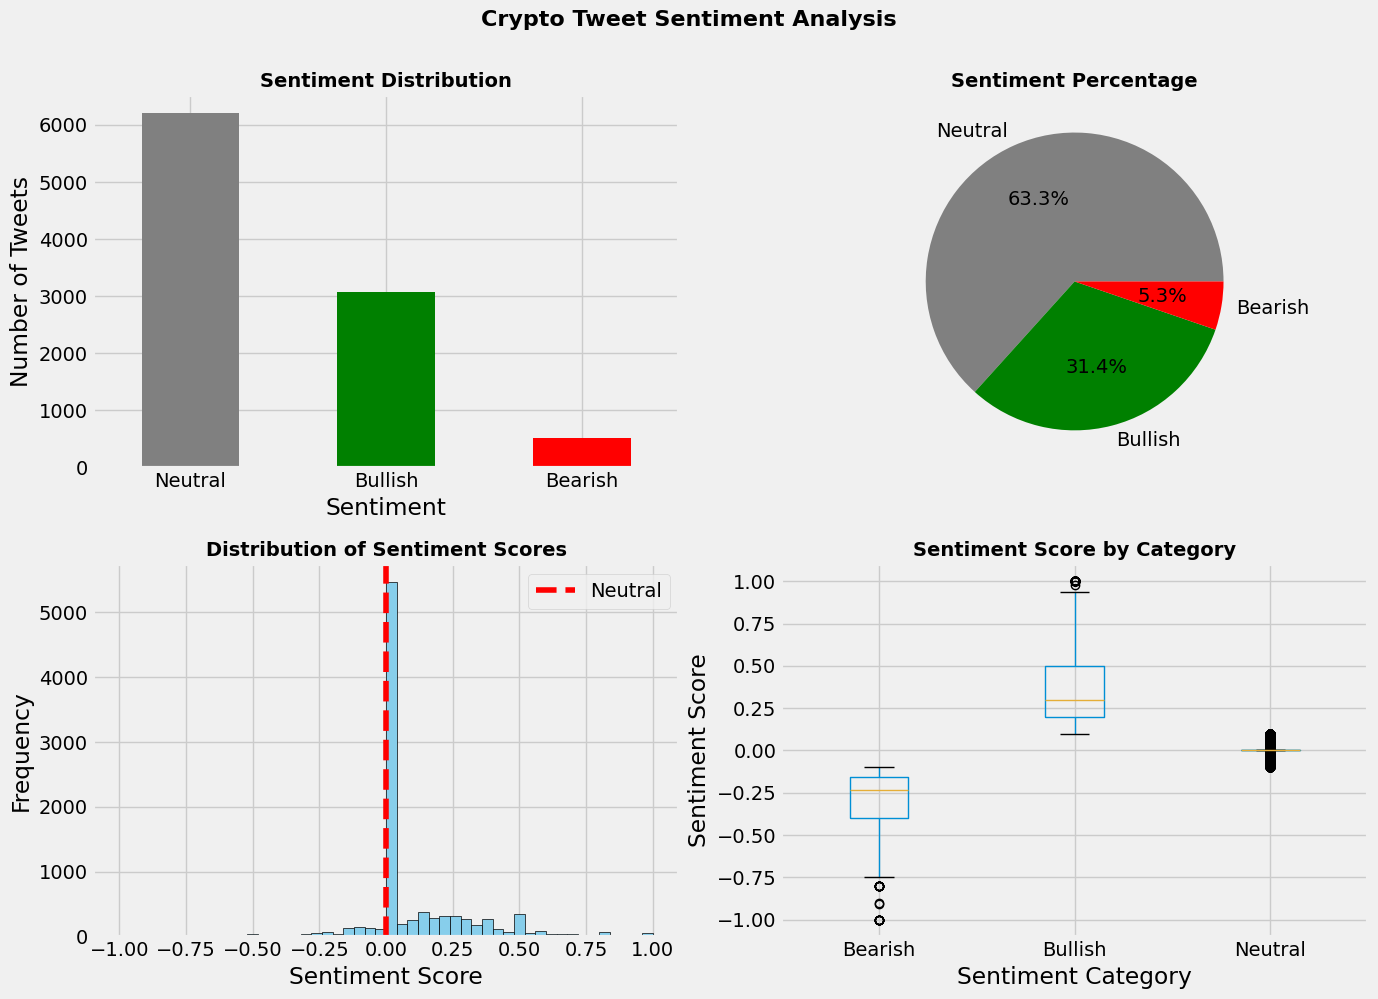

In [8]:
# Plot 1: Sentiment Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar chart of sentiment labels
ax1 = axes[0, 0]
colors = {'Bullish': 'green', 'Neutral': 'gray', 'Bearish': 'red'}
sentiment_counts.plot(kind='bar', ax=ax1, color=[colors[x] for x in sentiment_counts.index])
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Tweets')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Pie chart
ax2 = axes[0, 1]
sentiment_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                      colors=[colors[x] for x in sentiment_counts.index])
ax2.set_title('Sentiment Percentage', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# Histogram of sentiment scores
ax3 = axes[1, 0]
df['sentiment_score'].hist(bins=50, ax=ax3, color='skyblue', edgecolor='black')
ax3.set_title('Distribution of Sentiment Scores', fontsize=14, fontweight='bold')
ax3.set_xlabel('Sentiment Score')
ax3.set_ylabel('Frequency')
ax3.axvline(x=0, color='red', linestyle='--', label='Neutral')
ax3.legend()

# Box plot
ax4 = axes[1, 1]
df.boxplot(column='sentiment_score', by='sentiment_label', ax=ax4)
ax4.set_title('Sentiment Score by Category', fontsize=14, fontweight='bold')
ax4.set_xlabel('Sentiment Category')
ax4.set_ylabel('Sentiment Score')

plt.suptitle('Crypto Tweet Sentiment Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [9]:
# Show most bullish tweets
print("\n=== TOP 5 MOST BULLISH TWEETS ===")
bullish = df.nlargest(5, 'sentiment_score')[['text', 'sentiment_score']]
for idx, row in bullish.iterrows():
    print(f"\nScore: {row['sentiment_score']:.3f}")
    print(f"Tweet: {row['text'][:200]}...")

# Show most bearish tweets
print("\n\n=== TOP 5 MOST BEARISH TWEETS ===")
bearish = df.nsmallest(5, 'sentiment_score')[['text', 'sentiment_score']]
for idx, row in bearish.iterrows():
    print(f"\nScore: {row['sentiment_score']:.3f}")
    print(f"Tweet: {row['text'][:200]}...")


=== TOP 5 MOST BULLISH TWEETS ===

Score: 1.000
Tweet: CHANGE IS COMING...GET READY!!! Boom, Another [CB] Jab, Nothing Can Stop This! Globalism at its end stage, [CB] push to make a one world govt. coming to an end. 

The People Are Taking the Lead, &amp;...

Score: 1.000
Tweet: Find the best Cryptocurrency and Bitcoin Affiliate Programs on Forex Directory! #CryptocurrencyAffiliatePrograms #CryptocurrencyAffiliateMarketing #BitcoinAffiliatePrograms #BitcoinAffiliateMarketing ...

Score: 1.000
Tweet: Get best buy shopping spree https://t.co/wugOf3ZO0a ##jexpotz #bitcoin...

Score: 1.000
Tweet: Great weekend @ Silverstone, FIA World Rallycross Championship!...

Score: 1.000
Tweet: @p2psf Awesome Project   #blockchain #cryptocurrency #bitcoin #ethereum #ICO #P2PS #P2PSF #startup...


=== TOP 5 MOST BEARISH TWEETS ===

Score: -1.000
Tweet: @facebook stablecoins are so boring and unnecessary. Just use XRP or BTC!!!!!! https://t.co/eqnexO93cz...

Score: -1.000
Tweet: @BGIradji This how  , p

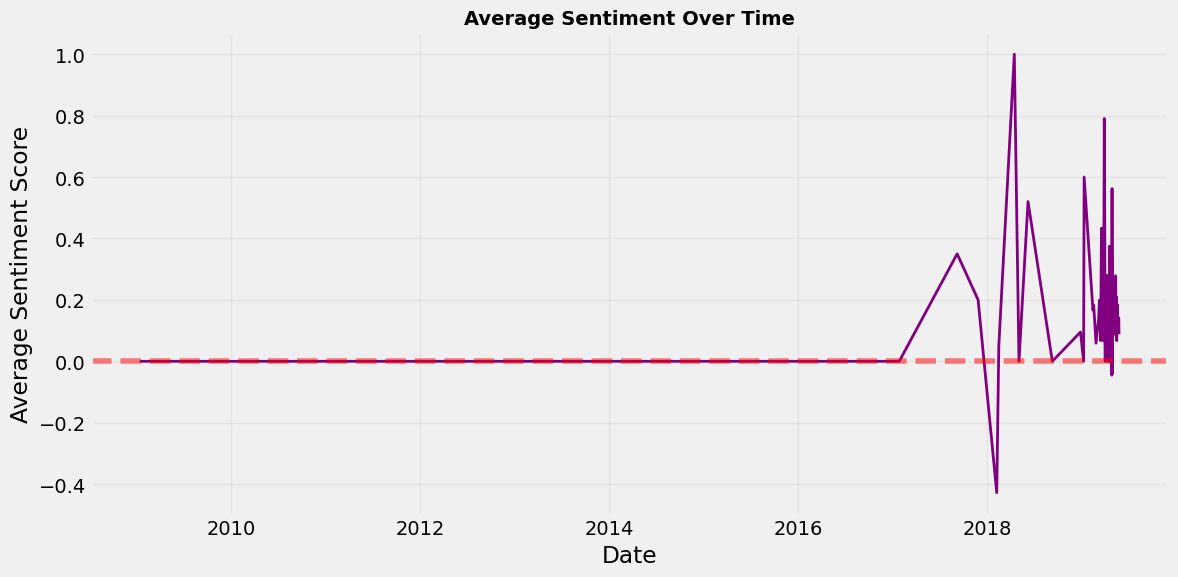

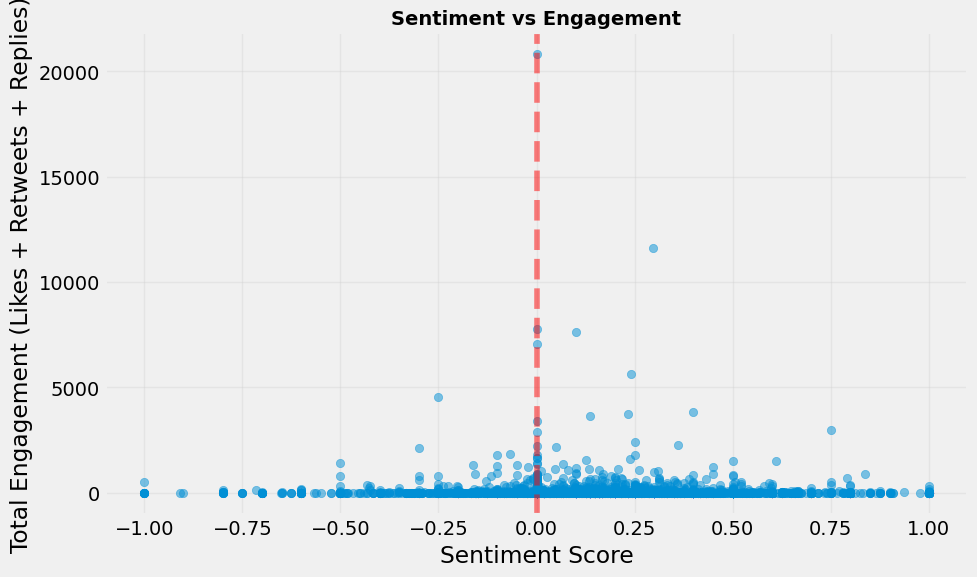

In [10]:
# Sentiment over time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

daily_sentiment = df.groupby('date')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot(kind='line', color='purple', linewidth=2)
plt.title('Average Sentiment Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Engagement vs Sentiment
df['total_engagement'] = df['likes'] + df['retweets'] + df['replies']

plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment_score'], df['total_engagement'], alpha=0.5)
plt.title('Sentiment vs Engagement', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Score')
plt.ylabel('Total Engagement (Likes + Retweets + Replies)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Save the analyzed data
df.to_csv('crypto_sentiment_analyzed.csv', index=False)
print("\nResults saved to 'crypto_sentiment_analyzed.csv'")

# Create summary report
summary = {
    'Total Tweets': len(df),
    'Bullish': sentiment_counts.get('Bullish', 0),
    'Bearish': sentiment_counts.get('Bearish', 0),
    'Neutral': sentiment_counts.get('Neutral', 0),
    'Average Sentiment': df['sentiment_score'].mean(),
    'Most Common Sentiment': df['sentiment_label'].mode()[0]
}

print("\n=== SUMMARY REPORT ===")
for key, value in summary.items():
    print(f"{key}: {value}")


Results saved to 'crypto_sentiment_analyzed.csv'

=== SUMMARY REPORT ===
Total Tweets: 9806
Bullish: 3083
Bearish: 515
Neutral: 6208
Average Sentiment: 0.09540218443984277
Most Common Sentiment: Neutral


In [12]:
# Don't push large data files or sensitive info
gitignore_content = """# Data files
*.csv
tweets.csv
crypto_sentiment_analyzed.csv

# Python
__pycache__/
*.pyc
*.pyo

# Jupyter/Colab
.ipynb_checkpoints/
*.ipynb

# Environment
.env
venv/
"""

with open('.gitignore', 'w') as f:
    f.write(gitignore_content)

print(".gitignore created!")

.gitignore created!


In [13]:
!git config --global user.name "elbse"
!git config --global user.email "charissepriego0140@gmail.com"

In [14]:
username = 'elbse'
repo = 'bitcoin-sentiment-analysis'